## 07-03 행렬곱으로 이해하는 신경망

### 순전파(Foward Propagation)

순전파:  주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정

### 행렬곱으로 순전파 이해하기

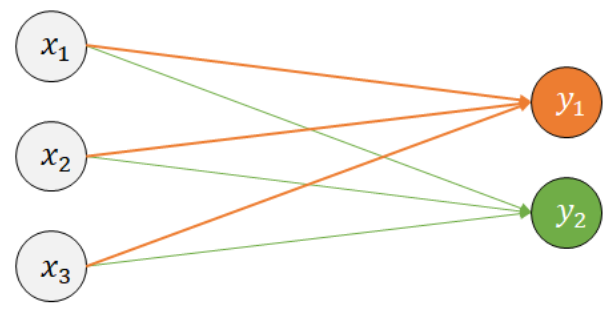
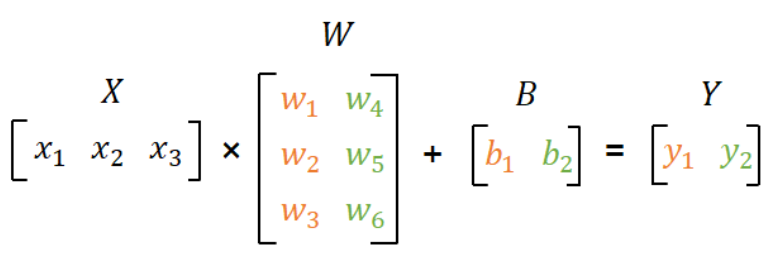
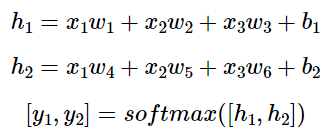

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


### 행렬곱으로 병렬 연산 이해하기

위의 예시에서는 데이터 중 1개의 샘플만을 처리한다고 가정했습습니다. 이번에는 인공 신경망이 4개의 샘플을 동시에 처리해본다고 가정해봅시다.

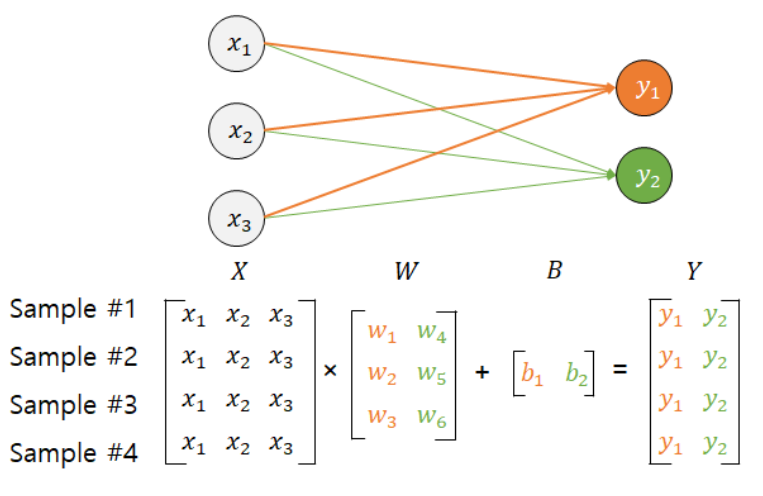

여기서 혼동하지 말아야 할 것은 인공 신경망의 4개의 샘플을 동시에 처리하고 있지만, 여기서 학습가능한 매개변수의 수는 여전히 8개라는 점입니다. 이렇게 인공 신경망이 다수의 샘플을 동시에 처리하는 것을 우리는 '배치 연산'이라고 부릅니다.

### 행렬곱으로 다층 퍼셉트론의 순전파 이해하기

1. 코드로 구현하기

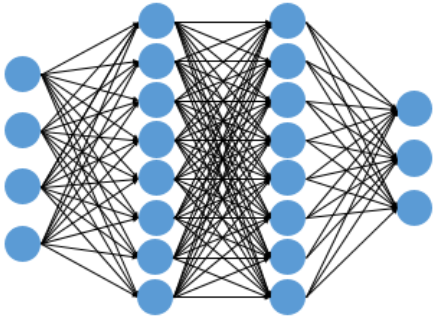

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

2. 행렬의 크기 추정해보기

층마다 생기는 가중치와 편향 행렬의 크기를 추정해봅시다.  
단, 배치 크기는 1을 가정합니다. (은닉층과 출력층에 활성화 함수 relu와 softmax가 존재하지만 활성화 함수는 행렬의 크기에 영향을 주지 않습니다.)

입력층 ⇒ 은닉층1  
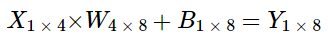  
은닉층1 ⇒ 은닉층2  
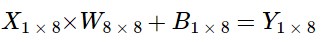  
은닉층2 ⇒ 은닉층3  
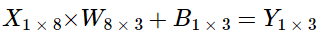

순전파를 진행하고 예측값을 구하고나서 이 다음에 인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고, 오차로부터 가중치와 편향을 업데이트하는 일입니다. 즉, 인공 신경망의 학습 단계에 해당됩니다. 이때 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)라고 합니다. 